In [4]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## EXTRACTING ORIGINAL DATA (EXCEL FILE) INTO  PANDAS DATAFRAME

In [6]:
# all sheets in the excel file

xl = pd.ExcelFile('data/sales/US_Regional_Sales_Data.xlsx')
xl.sheet_names

['Sales Orders Sheet',
 'Customers Sheet',
 'Store Locations Sheet',
 'Products Sheet',
 'Regions Sheet',
 'Sales Team Sheet']

## TRANSFORMING ORIGINAL DATA INTO A STAR SCHEMA

- ### **Sales Order Sheet**  <font color='green'>(Sales Fact Table)</font> <font color='blue'>  OrderNumber [PK]</font>

- **OrderNumber Column**

In [9]:
sales = xl.parse('Sales Orders Sheet', parse_dates=['ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate'])
sales.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31 00:00:00,2018-06-14,2018-06-19,USD,6,15,259,12,5.0,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31 00:00:00,2018-06-22,2018-07-02,USD,14,20,196,27,3.0,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31 00:00:00,2018-06-21,2018-07-01,USD,21,16,213,16,1.0,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31 00:00:00,2018-06-02,2018-06-07,USD,28,48,107,23,8.0,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31 00:00:00,2018-06-16,2018-06-26,USD,22,49,111,26,8.0,0.100,1822.4,1476.144


In [10]:
sales.shape

(7991, 16)

In [11]:
if sales['OrderNumber'].count() == len(sales['OrderNumber'].unique()) and sales['OrderNumber'].isna().sum() == 0: 
    print('OrderNumber is the primery key, with no null values')

OrderNumber is the primery key, with no null values


- **Sales Channel Column**

In [12]:
sales['Sales Channel'].value_counts()

In-Store          3297
Online            2424
Distributor       1374
Wholesale          891
Whole#_sale          2
On line              1
In___Store           1
Dis  _tributor       1
Name: Sales Channel, dtype: int64

In [13]:
# Replacing same categorical value w/different names to the same names. 

sales['Sales Channel'] = np.where((sales['Sales Channel'] == 'On line'), 'Online', sales['Sales Channel'])
sales['Sales Channel'] = np.where((sales['Sales Channel'] == 'Whole#_sale'), 'Wholesale', sales['Sales Channel'])
sales['Sales Channel'] = np.where((sales['Sales Channel'] == 'Dis  _tributor'), 'Distributor', sales['Sales Channel'])
sales['Sales Channel'] = np.where((sales['Sales Channel'] == 'In___Store'), 'In-Store', sales['Sales Channel'])

sales['Sales Channel'].value_counts()

In-Store       3298
Online         2425
Distributor    1375
Wholesale       893
Name: Sales Channel, dtype: int64

In [14]:
sales['ProcuredDate'].isnull().sum()      # checking if any null values in the column

0

- **WarehouseCode Column**

In [15]:
sales['WarehouseCode'].value_counts()           # checking different categorical variables in the column

WARE-NMK1003    2505
WARE-PUJ1005    1451
WARE-UHY1004    1265
WARE-XYS1001    1222
WARE-MKL1006     857
WARE-NBV1002     691
Name: WarehouseCode, dtype: int64

In [16]:
sales['WarehouseCode'].isnull().sum()        # checking if any null values in the column

0

- **Date Columns**

In [17]:
for col in ['ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate']:
    print(sales[col].dtypes)

datetime64[ns]
object
datetime64[ns]
datetime64[ns]


In [18]:
sales['OrderDate'] = sales['OrderDate'].str.split(' ', expand=True)[0]
sales.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5.0,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3.0,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1.0,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8.0,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8.0,0.100,1822.4,1476.144


In [19]:
sales['OrderDate'].value_counts()  # OrderDate col. has some values other than that of date format

2018-08-04    21
2019-05-04    20
2019-01-20    19
2019-04-04    18
2019-06-03    17
2018-12-23    17
2019-07-02    17
2019-01-04    17
2018-07-22    17
2020-09-21    16
2019-01-28    16
2020-07-24    15
2019-04-27    15
2018-12-30    15
2020-11-16    15
2019-01-01    15
2020-05-31    15
2019-09-09    15
2019-02-17    15
2018-09-14    14
2019-08-01    14
2019-08-02    14
2020-10-10    14
2018-08-27    14
2020-11-01    14
2020-11-17    14
2019-06-18    14
2019-06-12    14
2020-02-25    14
2020-03-07    14
2020-10-30    14
2020-03-21    14
2018-08-17    14
2019-05-11    14
2018-06-27    14
2019-04-24    14
2018-12-29    14
2019-01-10    14
2020-04-23    14
2018-12-15    14
2020-07-19    14
2018-12-12    14
2020-06-01    14
2020-05-09    13
2020-04-28    13
2019-01-08    13
2020-10-15    13
2020-01-07    13
2020-07-04    13
2019-10-26    13
2019-08-08    13
2020-04-07    13
2020-01-11    13
2018-09-11    13
2019-04-25    13
2020-01-12    13
2018-08-08    13
2018-12-31    13
2018-12-20    

In [20]:
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'], errors='coerce')   # converting OrderDate to datetime col.
sales.dropna(subset=['OrderDate'], inplace=True)  # dropping null values created due to error while changing col. to datetime

- **CurrencyCode Column**

In [21]:
sales['CurrencyCode'].value_counts()        # checking different categorical variables in the column

USD    7987
Name: CurrencyCode, dtype: int64

In [22]:
sales['CurrencyCode'].isnull().sum()       # checking if any null values in the column

0

- **Columns w/ Foreign Keys**

In [23]:
for col in ['_SalesTeamID', '_CustomerID', '_StoreID', '_ProductID']:   # checking datatypes & if any null values in the columns
    print(f'{col} [{sales[col].dtypes}]: {sales[col].isnull().sum()}')

_SalesTeamID [int64]: 0
_CustomerID [int64]: 0
_StoreID [int64]: 0
_ProductID [int64]: 0


- **Order Quantity Column**

In [24]:
sales['Order Quantity'].dtype           # checking datatyoe of the column

dtype('float64')

In [25]:
sales['Order Quantity'] = sales['Order Quantity'].astype(int)         # converting datatype float to int

In [26]:
sales['Order Quantity'].isnull().sum()             # checking if any null values in the column

0

In [27]:
sales.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Price', 'Unit Cost'],
      dtype='object')

- **Customers Sheet** <font color='green'>(Customer Dimension Table)</font> <font color='blue'>  _CustomerID [PK]</font>

In [28]:
customers = xl.parse('Customers Sheet')
customers.head()

,_CustomerID,Customer Names
0,1,Avon Corp
1,2,WakeFern
2,3,"Elorac, Corp"
3,4,ETUDE Ltd
4,5,Procter Corp


- **_CustomerID Column**

In [29]:
if customers['_CustomerID'].count() == len(customers['_CustomerID'].unique()): print(' _CustomerID is the primary key.')

 _CustomerID is the primary key.


In [30]:
customers.shape

(50, 2)

In [31]:
customers.isnull().sum()      # checking if any null values in the column

_CustomerID       0
Customer Names    0
dtype: int64

In [32]:
# Checking if all the values of FK _CustomerID in sales Table are subset of PK _CustomerID in customers Table

set(sales['_CustomerID']).issubset(set(customers['_CustomerID']))   

True

- **Customer Names Column**

In [33]:
customers['Customer Names'].value_counts()        # checking different categorical variables in the column

Avon Corp          1
Ascend Ltd         1
Dharma Ltd         1
Apotheca, Ltd      1
S.S.S. Group       1
Uriel Group        1
OHTA'S Corp        1
Trigen             1
OUR Ltd            1
Amylin Group       1
O.E. Ltd           1
AuroMedics Corp    1
Victory Ltd        1
WakeFern           1
Select             1
Weimei Corp        1
Llorens Ltd        1
Exact-Rx, Corp     1
Winthrop           1
Nipro              1
U.S. Ltd           1
Niconovum Corp     1
Fenwal, Corp       1
Bare               1
Wuxi Group         1
Mylan Corp         1
Prasco Group       1
Burt's Corp        1
Elorac, Corp       1
ETUDE Ltd          1
Procter Corp       1
PEDIFIX, Corp      1
New Ltd            1
Medsep Group       1
Ei                 1
21st Ltd           1
Apollo Ltd         1
Medline            1
Ole Group          1
Linde              1
Rochester Ltd      1
3LAB, Ltd          1
Pure Group         1
Eminence Corp      1
Qualitest          1
Pacific Ltd        1
Ohio               1
Capweld      

In [34]:
customers

,_CustomerID,Customer Names
0,1,Avon Corp
1,2,WakeFern
2,3,"Elorac, Corp"
3,4,ETUDE Ltd
4,5,Procter Corp
5,6,"PEDIFIX, Corp"
6,7,New Ltd
7,8,Medsep Group
8,9,Ei
9,10,21st Ltd


- **Store Locations Sheet** <font color='green'>(Stores Dimension Table)</font> <font color='blue'>  _StoreID [PK]</font>

In [70]:
stores = xl.parse('Store Locations Sheet')
stores.head()

,_StoreID,City Name,County,StateCode,State,Type,Latitude,Longitude,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Time Zone
0,1,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
1,2,Huntsville,Limestone County/Madison County,AL,Alabama,City,34.69901,-86.67298,256,190582,78554,48775,552604579,3452021,America/Chicago
2,3,Mobile,Mobile County,AL,Alabama,City,30.69436,-88.04305,251,194288,76170,38776,361044263,105325210,America/Chicago
3,4,Montgomery,Montgomery County,AL,Alabama,City,32.36681,-86.29997,334,200602,79866,42927,413985435,4411954,America/Chicago
4,5,Little Rock,Pulaski County,AR,Arkansas,City,34.74648,-92.28959,501,197992,79902,46085,307398785,6758644,America/Chicago


- **_StoreID Column**

In [71]:
if stores['_StoreID'].count() == len(stores['_StoreID'].unique()): print('StoreID is the primary key.')

StoreID is the primary key.


In [72]:
stores.isnull().sum()          # checking if any null values in the columns

_StoreID            0
City Name           0
County              0
StateCode           0
State               0
Type                0
Latitude            0
Longitude           0
AreaCode            0
Population          0
Household Income    0
Median Income       0
Land Area           0
Water Area          0
Time Zone           0
dtype: int64

In [73]:
# Checking if all the values of FK _StorerID in sales Table are subset of PK _StoreID in stores Table

set(stores['_StoreID']).issubset(set(stores['_StoreID']))  

True

- **Checking Categorical Columns**

In [74]:
# Checking different categorical variables in the columns

for col in ['City Name', 'County', 'StateCode', 'State', 'Type']:   
    print(f'{col} [{stores[col].dtype}]')
    print('\nColumns:\n')
    print(stores[col].value_counts())
    print('\n\n')

City Name [object]

Columns:

Columbia                      3
Springfield                   3
Aurora                        2
Wayne                         2
Pasadena                      2
Arlington                     2
Columbus                      2
Richmond                      2
Rochester                     2
Kansas City                   2
Washington                    2
Peoria                        2
Glendale                      2
Warren                        2
Las Vegas                     1
Enterprise                    1
Las Cruces                    1
Albuquerque                   1
Woodbridge (Township)         1
Paterson                      1
Queens                        1
Newark                        1
Ramapo                        1
Smithtown                     1
Jersey City                   1
Staten Island                 1
Elizabeth                     1
Edison                        1
Manchester                    1
Omaha                         1
Henderson 

- **Checking Latitude, Longitude and other columns w/ Numerical Variables**

In [75]:
stores.dtypes   # Checking datatype sof the columns

_StoreID              int64
City Name            object
County               object
StateCode            object
State                object
Type                 object
Latitude            float64
Longitude           float64
AreaCode              int64
Population            int64
Household Income      int64
Median Income         int64
Land Area             int64
Water Area            int64
Time Zone            object
dtype: object

- **Time Zone Column**

In [76]:
stores['Time Zone'].value_counts()

America/Chicago                 112
America/New York                111
America/Los Angeles              95
America/Denver                   21
America/Phoenix                  10
America/Indiana/Indianapolis     10
America/Detroit                   6
Pacific/Honolulu                  1
America/Boise                     1
Name: Time Zone, dtype: int64

In [77]:
stores.columns

Index(['_StoreID', 'City Name', 'County', 'StateCode', 'State', 'Type',
       'Latitude', 'Longitude', 'AreaCode', 'Population', 'Household Income',
       'Median Income', 'Land Area', 'Water Area', 'Time Zone'],
      dtype='object')

- ### Products Sheet  <font color='green'>(Product Dimension Table)</font> <font color='blue'>  _ProductID [PK]</font>

In [78]:
products = xl.parse('Products Sheet')
products.head()

,_ProductID,Product Name
0,1,Cookware
1,2,Photo Frames
2,3,Table Lamps
3,4,Serveware
4,5,Bathroom Furniture


In [79]:
if products['_ProductID'].count() == len(products['_ProductID'].unique()): print('_ProductID is the primary key.')

_ProductID is the primary key.


In [80]:
# Checking if all the values of FK _ProductID in sales Table are subset of PK _ProductID in products Table

set(sales['_ProductID']).issubset(set(products['_ProductID']))   

True

In [81]:
products['Product Name'].value_counts()

Cookware              1
Clocks                1
Wreaths               1
Phones                1
Pendants              1
Wall Coverings        1
Candleholders         1
Vases                 1
Outdoor Decor         1
Bedroom Furniture     1
Table Linens          1
Platters              1
TV and video          1
Wardrobes             1
Floor Lamps           1
Rugs                  1
Collectibles          1
Bean Bags             1
Festive               1
Pillows               1
Home Fragrances       1
Sculptures            1
Candles               1
Wall Frames           1
Photo Frames          1
Dining Furniture      1
Table Lamps           1
Serveware             1
Bathroom Furniture    1
Computers             1
Dinnerware            1
Cocktail Glasses      1
Baseball              1
Blankets              1
Ornaments             1
Bakeware              1
Accessories           1
Mirrors               1
Outdoor Furniture     1
Stemware              1
Furniture Cushions    1
Basketball      

In [83]:
products.columns

Index(['_ProductID', 'Product Name'], dtype='object')

- ### Regions Sheet   <font color='green'>(Regions Dimension Table)</font> <font color='blue'>  StateCode [PK]</font>

In [84]:
regions = xl.parse('Regions Sheet')
regions.head()

,StateCode,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [85]:
if regions['StateCode'].count() == len(regions['StateCode'].unique()): print('StateCode is the primary key.')

StateCode is the primary key.


In [86]:
# Checking if all the values of FK StateCode in stores Table are subset of PK StateCode in teams Table

set(stores['StateCode']).issubset(set(regions['StateCode']))   

True

In [87]:
regions.columns

Index(['StateCode', 'State', 'Region'], dtype='object')

- ### Sales Team Sheet <font color='green'>(Teams Dimension Table)</font> <font color='blue'>  _SalesTeamID [PK]</font>

In [88]:
teams = xl.parse('Sales Team Sheet')
teams.head()

,_SalesTeamID,Sales Team,Region
0,1,Adam Hernandez,Northeast
1,2,Keith Griffin,Northeast
2,3,Jerry Green,West
3,4,Chris Armstrong,Northeast
4,5,Stephen Payne,South


In [89]:
if teams['_SalesTeamID'].count() == len(teams['_SalesTeamID'].unique()): print('_SalesTeamID is the primary key.') 

_SalesTeamID is the primary key.


In [90]:
# Checking if all the values of FK _SalesTeamID in sales Table are subset of PK _SalesTeamID in teams Table

set(sales['_SalesTeamID']).issubset(set(teams['_SalesTeamID']))   

True

In [91]:
teams.columns

Index(['_SalesTeamID', 'Sales Team', 'Region'], dtype='object')

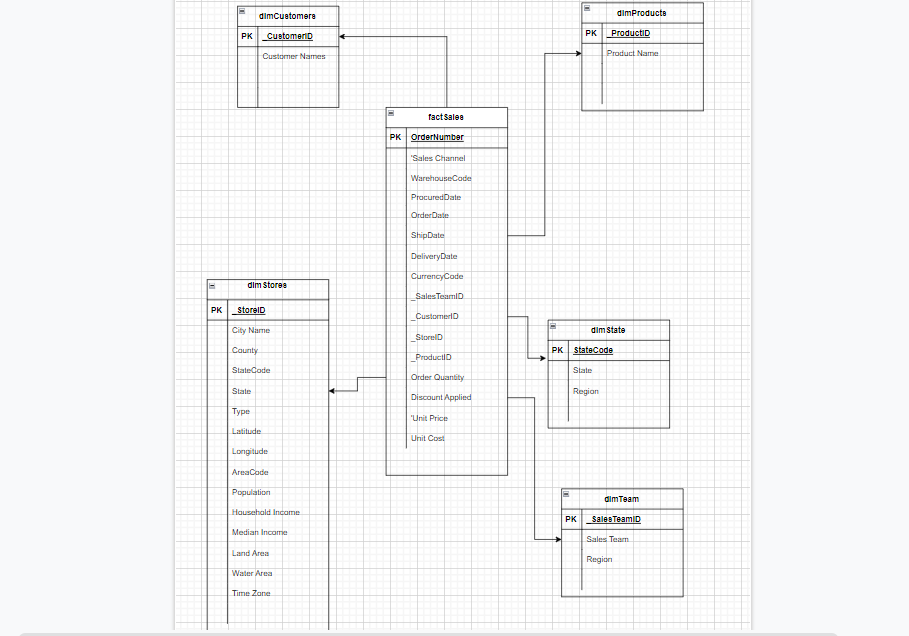

## EXPORTING TRANSFORMED TABLES (STAR SCHEMA) IN TO CSV FILES

In [92]:
dir_path = 'data/sales/cleaned'       # cleaned dir path
if not os.path.exists(dir_path): 
    os.mkdir(dir_path)   # creating cleaned dir to load transformed data

In [93]:
sales_path = os.path.join(dir_path, 'sales.csv')
if not os.path.exists(sales_path): sales.to_csv(sales_path, index=False)
    
customers_path = os.path.join(dir_path, 'customers.csv')
if not os.path.exists(customers_path): customers.to_csv(customers_path, index=False)
    
stores_path = os.path.join(dir_path, 'stores.csv')
if not os.path.exists(stores_path): stores.to_csv(stores_path, index=False)
    
products_path = os.path.join(dir_path, 'products.csv')
if not os.path.exists(products_path): products.to_csv(products_path, index=False)
    
regions_path = os.path.join(dir_path, 'regions.csv')
if not os.path.exists(regions_path): regions.to_csv(regions_path, index=False)
    
teams_path = os.path.join(dir_path, 'teams.csv')
if not os.path.exists(teams_path): teams.to_csv(teams_path, index=False)

## IMPORTING FACT & DIMENSION TABLES TO THE POSTGRES DATABASE

In [96]:
import psycopg2

In [97]:
# connecting to the default 'postgres' database
try: 
    conn = psycopg2.connect('host=localhost dbname=postgres user=postgres password=786420')
    conn.set_session(autocommit=True)   # makes conn.commit() by default after each command
except psycopg2.Error as e: 
    print('ERRRRROR')
    print(e)

    
# creating a cursor using conn to execute sql queries 
try: cur = conn.cursor()
except psycopg2.Error as e:
    print('ERRRRRRROR')
    print(e)

    
# creating a new Database 'salesinsight'
try: 
    cur.execute('create database salesinsight')
    print('salesinsight DATABASE CREATED')
except psycopg2.Error as e:
    print(e)
    
    
# closing connection to default database postgres
try: conn.close()
except psycopg2.Error as e: print(e)
    
    
# creating connection to the database salesinsight 
try: conn = psycopg2.connect('host=localhost dbname=salesinsight user=postgres password=786420')
except psycopg2.Error as e: print(e)

    
# creating a cursor using conn to execute sql queries
try: 
    cur = conn.cursor()
    conn.set_session(autocommit=True)
except psycopg2.Error as e:
    print('cant connect to the database')
    print(e)
    


salesinsight DATABASE CREATED


### CREATE TABLE QUERIES

In [100]:
dimCustomers_table_create = ('''CREATE TABLE IF NOT EXISTS dimCustomers(
    _CustomerID INT PRIMARY KEY,
    CustomerNames VARCHAR
)''')

dimStores_table_create = ('''CREATE TABLE IF NOT EXISTS dimStores(
    _StoreID INT PRIMARY KEY,
    CustomerNames VARCHAR,
    County,
    StateCode,
    State,
    Type,
    Latitude,
    Longitude,
    AreaCode,
    Population,
    HouseholdIncome,
    MedianIncome,
    LandArea,
    WaterArea,
    TimeZone
)''')

dimProducts = ('''CREATE TABLE IF NOT EXISTS dimProducts(
    _ProductID,
    ProductName)''')

dimState = ('''CREATE TABLE IF NOT EXISTS dimState(
    StateCode,
    State,
    Region)''')

dimTeams = ('''CREATE TABLE IF NOT EXISTS dimTeam(
    _SalesTeamID,
    SalesTeam,
    Region)''')

factSales = ('''CREATE TABLE IF NOT EXISTS factSales(
    OrderNumber,
    Sales Channel
    WarehouseCode,
    ProcuredDate,
    OrderDate,
    ShipDate,
    DeliveryDate,
    CurrencyCode, 
    _SalesTeamID,
    _CustomerID,
    _StoreID, 
    _ProductID, 
    OrderQuantity,
    DiscountApplied, 
    Unit Price, 
    Unit Cost)''')

### INSERT TABLES QUERIES

In [ ]:
# INSERT RECORDS queries

dimCustomers_table_insert = ("""INSERT INTO dimCustomers VALUES (DEFAULT, %s, %s, %s, %s, %s, %s, %s, %s )
""")

# Updating the user level on conflict
dimstores_table_insert = ("""INSERT INTO dimStores (user_id, first_name, last_name, gender, level) VALUES (%s, %s, %s, %s, %s) 
                        ON CONFLICT (user_id) DO UPDATE SET 
                        level = EXCLUDED.level 
""")

dimProducts_table_insert = ("""INSERT INTO dimProducts (song_id, title, artist_id, year, duration) VALUES (%s, %s, %s, %s, %s) 
                        ON CONFLICT (song_id) DO NOTHING                        
""")

# Artist location, latitude and longitude might change and need to be updated.
dimState_table_insert = ("""INSERT INTO dimState (artist_id, name, location, latitude, longitude) VALUES (%s, %s, %s, %s, %s) 
                          ON CONFLICT (artist_id) DO UPDATE SET
                          location = EXCLUDED.location,
                          latitude = EXCLUDED.latitude,
                          longitude = EXCLUDED.longitude
""")

dimTeams_table_insert = ("""INSERT INTO dimTeams VALUES (%s, %s, %s, %s, %s, %s, %s) ON CONFLICT (start_time) DO NOTHING
""")

dimTeams_table_insert = ("""INSERT INTO dimTeams VALUES (%s, %s, %s, %s, %s, %s, %s) ON CONFLICT (start_time) DO NOTHING
""")
factSales_table_insert = ('''INSERT INTO factSales VALUES''')